In this notebook, we're going to do some **NLP** pipeline steps on some *Neural Network* lectures

these steps contains the follwoing:
<ol>
    <li>Data Gathering</li>
    <li>Data Extraction & Cleanups</li>
    <li>Data preprocessing</li>
    <li>Feature engineering</li>
    <li>Model Building, Monitoring and Deployment</li>
</ol>


this notebook is designed by codebasics youtube channel:
__[Codebasics NLP playlist](https://www.youtube.com/watch?v=R-AG4-qZs1A&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&pp=iAQB)__

Data source: __[Neural Network Lectures](https://drive.google.com/drive/folders/1tzDpYU9zgY0NZ9PbVC0EiDsSAIWNznBU?usp=drive_link)__

### Import required Libraries

In [3]:
import PyPDF2
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Data Gathering

In our case, I want to scrap one of the neural networks lectures that I have studeid in my college called "Lec 8.pdf"
and I have used *PyPDF2* package to extract just 2 pages of it.

In [5]:
f = open("lec 8.pdf", "rb")
pdfReader = PyPDF2.PdfReader(f)

In [6]:
# to know the number of pages
len(pdfReader.pages)

12

### Data Exraction & Cleanup

#### Data Extraction

In [9]:
text_list = []
page = 1
page2 = pdfReader.pages[page]
page3 = pdfReader.pages[page+1]
text_list.append(page2.extract_text())
text_list.append(page3.extract_text())

In [10]:
text_list

['•In this lecture, we take a completely different approach. Specifically, we \nsolve the problem of classifying nonlinearly separable patterns by \nproceeding in a hybrid manner, involving two stages: \n•The first stage transforms a given set of nonlinearly separable patterns \ninto a new set for which, under certain conditions, the likelihood of the \ntransformed patterns becoming linearly separable is high; the \nmathematical justification of this transformation is traced to an early \npaper by Cover (1965 ).\n•The second stage completes the solution to the prescribed classification \nproblem by using least -squares estimation ',
 '•using a radial -basis function (RBF) network , the structure of which \nconsists of only three layers: \n•The input layer is made up of source nodes (sensory units) that connect the network to its \nenvironment.\n•The second layer, consisting of hidden units , applies a nonlinear transformation\nfrom the input space to the hidden (feature) space. For mos

In [11]:
text = ' '.join(text_list)

**For extracting all Pages**: 

In [13]:
allPages = [0] 
for page in range(len(pdfReader.pages)):
    page = pdfReader.pages[page]
    allPages.append(page.extract_text())
#uncomment the below line and run it for print all lecture
#lecture = ' '.join(allPages) 

#### Data Cleanup
We're going to data cleanup, such as removing punctuation marks using Regex **"re"**

In [15]:
import re

In [16]:
text_cleaned = re.sub('[^A-Za-z0-9]+', ' ', text)

In [17]:
text_cleaned

' In this lecture we take a completely different approach Specifically we solve the problem of classifying nonlinearly separable patterns by proceeding in a hybrid manner involving two stages The first stage transforms a given set of nonlinearly separable patterns into a new set for which under certain conditions the likelihood of the transformed patterns becoming linearly separable is high the mathematical justification of this transformation is traced to an early paper by Cover 1965 The second stage completes the solution to the prescribed classification problem by using least squares estimation using a radial basis function RBF network the structure of which consists of only three layers The input layer is made up of source nodes sensory units that connect the network to its environment The second layer consisting of hidden units applies a nonlinear transformation from the input space to the hidden feature space For most applications the dimensionality of the only hidden layer of th

### Data preprocessing

We have now 4 steps of text preprocessing:
<ol>
    <li>Sentence Tokenization</li>
    <li>Word Tokenization</li>
    <li>POS tagging, Stemming & Lemmatization</li>
    <li>NER: Named Entity Recognition</li>
    <li>Stop Words Removal</li>
    
</ol>

for setence tokenization, there is no mean to do it after we have removed all the punctuations marks, so we're heading to word tokenization.


In the process of tokenization, there are two libraries are specified with tokenization and they <code>Spacy</code> and <code>NLTK</code>, and am going to use them both.

if you want to know the defference between the both of them, you can click the following link: 

__[Spacy vs NLTK](https://www.youtube.com/watch?v=h2kBNEShsiE&t=796s)__


#### 2) Word Tokenization

##### Tokenization using NLTK

In [21]:
words = pd.DataFrame(data = {}, columns=["NLTK words", "Spacy Words"])
# this data frame to hold the words in a fancy look for tokenized words with NLTK & Spacy

In [22]:
import nltk 
from nltk.tokenize import word_tokenize
# just in mind, to do sentence tokenizer, uncomment the following
#from nltk.tokenize import sent_tokenize

In [23]:
nltk_word_tokens = word_tokenize(text_cleaned)

In [24]:
words["NLTK words"] = nltk_word_tokens

##### Tokenization using Spacy

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm") # you can do large by writting "lm" for largers package

text_spacy = nlp(text_cleaned)

In [27]:
spacy_word_tokens = []
for token in text_spacy:
    if not token.is_space: # there also token.is_punc  we didnt use it because already removed any punctuations
        spacy_word_tokens.append(token.text)

In [28]:
words["Spacy Words"] = spacy_word_tokens

In [29]:
words

,NLTK words,Spacy Words
0,In,In
1,this,this
2,lecture,lecture
3,we,we
4,take,take
...,...,...
207,2,2
208,of,of
209,the,the
210,hybrid,hybrid


#### 3) POS Tagging, Stemming & Lemmatization
here we're gonig to do the same as tokenization with **Spacy** & **NLTK**

##### Stemming
stemming means removing any words addition such as suffiex, prefix, etc. using herustic rules

ex:
 1) eating--> eat
 2) talking--> talk
 3) adjustable-->adjust

sometimes using stemming us kinda stupid, since its a fixed rule, there will be some issue.

for example: 
 1) ability-->abil (romved *ity*)


So, in Spacy, there is no stemming because they (spacy authors) choosed lemmatization since its more accurate.

###### **Stemming using NLTK**

In [33]:
from nltk.stem import PorterStemmer

stemmerNLTk = PorterStemmer()

In [34]:
words["Stemmed word with NLTK"] = {} # adding a new column for stemmed words for NLTK

In [35]:
nltk_stemmed_words = [] # a list for hodling the stemmed words 

In [36]:
for word in words["NLTK words"]:
    nltk_stemmed_words.append(stemmerNLTk.stem(word))

In [37]:
words["Stemmed word with NLTK"] = nltk_stemmed_words
words

,NLTK words,Spacy Words,Stemmed word with NLTK
0,In,In,in
1,this,this,thi
2,lecture,lecture,lectur
3,we,we,we
4,take,take,take
...,...,...,...
207,2,2,2
208,of,of,of
209,the,the,the
210,hybrid,hybrid,hybrid


##### Lemmatization
lemmatization means is getting the base word (also its a lemma) using the knowledge of the language.

ex:
   1) ate-->eat
   2) talked--> talk
   3) written-->write

###### **Lemmatization using Spacy**

Try to make it for whole lectures of NN

In [41]:
words["Lemmatized words with SPacy"] = {}
spacy_lemmatized_words = []

In [42]:
for token in text_spacy:
    if not token.is_space: 
        spacy_lemmatized_words.append(token.lemma_)

words["Lemmatized words with SPacy"] = spacy_lemmatized_words

In [43]:
words

,NLTK words,Spacy Words,Stemmed word with NLTK,Lemmatized words with SPacy
0,In,In,in,in
1,this,this,thi,this
2,lecture,lecture,lectur,lecture
3,we,we,we,we
4,take,take,take,take
...,...,...,...,...
207,2,2,2,2
208,of,of,of,of
209,the,the,the,the
210,hybrid,hybrid,hybrid,hybrid


in case we want to do a customization behaviour of the model.
it goes as the following

lets we want to get attribute ruler function and add some customization to it.

In [45]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [46]:
ar = nlp.get_pipe("attribute_ruler")

ar.add([[{"TEXT": "Bro"}], [{"TEXT": "Brah"}]], {"LEMMA": "Brother"})

In [47]:
sent = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

In [48]:
for token in sent:
    print(token," | ",token.lemma_)

Bro  |  Brother
,  |  ,
you  |  you
wanna  |  wanna
go  |  go
?  |  ?
Brah  |  Brother
,  |  ,
do  |  do
n't  |  not
say  |  say
no  |  no
!  |  !
I  |  I
am  |  be
exhausted  |  exhaust


<code>Here we made a customization behaviour on the pipeline as above</code>

###### **Lemmatization using NLTK**

In [51]:
from nltk.stem import WordNetLemmatizer

lemmaNLTK = WordNetLemmatizer()

In [52]:
words["Lemmatized words with NLTK"] = {}
nltk_lemmatized_words = []

In [53]:
for word in words["NLTK words"]:
    nltk_lemmatized_words.append(lemmaNLTK.lemmatize(word))
words["Lemmatized words with NLTK"] = nltk_lemmatized_words
words

,NLTK words,Spacy Words,Stemmed word with NLTK,Lemmatized words with SPacy,Lemmatized words with NLTK
0,In,In,in,in,In
1,this,this,thi,this,this
2,lecture,lecture,lectur,lecture,lecture
3,we,we,we,we,we
4,take,take,take,take,take
...,...,...,...,...,...
207,2,2,2,2,2
208,of,of,of,of,of
209,the,the,the,the,the
210,hybrid,hybrid,hybrid,hybrid,hybrid


Stemming:

Stemming in general focuses on chopping off prefixes and suffixes to reduce a word to its base or root form. Popular stemmers, such as the Porter or Snowball stemmer, tend to lower the case of the input word by default (even if it's in uppercase).
For example, stemming both "Running" and "running" would typically result in "run" (in lowercase).

Lemmatization (NLTK):

Lemmatization, especially when using NLTK's WordNetLemmatizer, generally does not change the case of the input word. It retains the case (lowercase or uppercase) of the original word. So if you lemmatize "Running" or "running", it will map both to "Running" and "running", respectively.

##### POS


Here where you can find everything for **POS tagging** documentation

__[Spacy Doc](https://v2.spacy.io/api/annotation#pos-universal)__


###### **POS using Spacy**

In [57]:
words["Tags with Spacy"] = {}
words["ID tags with Spacy"] = {}

In [58]:
tags_spacy = []
tags_id_spacy = []
for token in text_spacy:
    if not token.is_space:
        tags_spacy.append(token.pos_)
        tags_id_spacy.append(token.pos)

In [59]:
words["Tags with Spacy"] = tags_spacy
words["ID tags with Spacy"] = tags_id_spacy

In [60]:
words

,NLTK words,Spacy Words,Stemmed word with NLTK,Lemmatized words with SPacy,Lemmatized words with NLTK,Tags with Spacy,ID tags with Spacy
0,In,In,in,in,In,ADP,85
1,this,this,thi,this,this,DET,90
2,lecture,lecture,lectur,lecture,lecture,NOUN,92
3,we,we,we,we,we,PRON,95
4,take,take,take,take,take,VERB,100
...,...,...,...,...,...,...,...
207,2,2,2,2,2,NUM,93
208,of,of,of,of,of,ADP,85
209,the,the,the,the,the,DET,90
210,hybrid,hybrid,hybrid,hybrid,hybrid,ADJ,84


In [61]:
sent1 = nlp("Nice borther!, and wow that was so profesional code write there!. Did you made it?")
# an example how to spacy can idenify the punctuation marks
for token in sent1:
    print(token, " | ", token.pos, " | ", token.pos_, " | ", token.tag_, " | ", spacy.explain(token.tag_))
    #     word          id in pos         what is mean       tense of word       more explanaitin of tense

Nice  |  84  |  ADJ  |  JJ  |  adjective (English), other noun-modifier (Chinese)
borther  |  92  |  NOUN  |  NN  |  noun, singular or mass
!  |  97  |  PUNCT  |  .  |  punctuation mark, sentence closer
,  |  97  |  PUNCT  |  ,  |  punctuation mark, comma
and  |  89  |  CCONJ  |  CC  |  conjunction, coordinating
wow  |  91  |  INTJ  |  UH  |  interjection
that  |  95  |  PRON  |  DT  |  determiner
was  |  87  |  AUX  |  VBD  |  verb, past tense
so  |  86  |  ADV  |  RB  |  adverb
profesional  |  84  |  ADJ  |  JJ  |  adjective (English), other noun-modifier (Chinese)
code  |  92  |  NOUN  |  NN  |  noun, singular or mass
write  |  100  |  VERB  |  VB  |  verb, base form
there  |  86  |  ADV  |  RB  |  adverb
!  |  97  |  PUNCT  |  .  |  punctuation mark, sentence closer
.  |  97  |  PUNCT  |  .  |  punctuation mark, sentence closer
Did  |  87  |  AUX  |  VBD  |  verb, past tense
you  |  95  |  PRON  |  PRP  |  pronoun, personal
made  |  100  |  VERB  |  VBD  |  verb, past tense
it  |  

###### **POS using NLTK**

In [63]:
words["Tags with NLTK"] = {}
words["Details with spacy"] = {}

In [64]:
tag_nltk = nltk.pos_tag(nltk_word_tokens)
details = [spacy.explain(tag) for _, tag in tag_nltk]
# the details column that I have made came from spacy, this why its called *** with spacy

In [65]:
# there also tag in spacy
spacy.explain(text_spacy[1].tag_)

'conjunction, subordinating or preposition'

In [66]:
words["Tags with NLTK"] = [tag for _,tag in tag_nltk]
words["Details with spacy"] = details

In [67]:
words

,NLTK words,Spacy Words,Stemmed word with NLTK,Lemmatized words with SPacy,Lemmatized words with NLTK,Tags with Spacy,ID tags with Spacy,Tags with NLTK,Details with spacy
0,In,In,in,in,In,ADP,85,IN,"conjunction, subordinating or preposition"
1,this,this,thi,this,this,DET,90,DT,determiner
2,lecture,lecture,lectur,lecture,lecture,NOUN,92,NN,"noun, singular or mass"
3,we,we,we,we,we,PRON,95,PRP,"pronoun, personal"
4,take,take,take,take,take,VERB,100,VBP,"verb, non-3rd person singular present"
...,...,...,...,...,...,...,...,...,...
207,2,2,2,2,2,NUM,93,CD,cardinal number
208,of,of,of,of,of,ADP,85,IN,"conjunction, subordinating or preposition"
209,the,the,the,the,the,DET,90,DT,determiner
210,hybrid,hybrid,hybrid,hybrid,hybrid,ADJ,84,JJ,"adjective (English), other noun-modifier (Chin..."


#### 4) NER: Named Entity Recognition


Named Entity Recognition (NER) is the process of extracting entities and their types from text. In other words, it identifies predefined categories of objects within a body of text, such as:
1) Locations
2) Company names
3) People name
4) etc...

Since Spacy is easier to use, we decided continue using it.

**NER using Spacy**

In [70]:
ner = pd.DataFrame(data = {}, columns=["Entity","NER with Spacy(Label)", "Label explained with Spacy"])

In [71]:
spacy_entity = []
spacy_label = []
spacy_label_explained = []

In [72]:
for entitiy in text_spacy.ents:
    spacy_entity.append(entitiy)
    spacy_label.append(entitiy.label_)
    spacy_label_explained.append(spacy.explain(entitiy.label_))

In [73]:
ner["Entity"] = spacy_entity
ner["NER with Spacy(Label)"] = spacy_label
ner["Label explained with Spacy"] = spacy_label_explained

In [74]:
ner

,Entity,NER with Spacy(Label),Label explained with Spacy
0,(two),CARDINAL,Numerals that do not fall under another type
1,(first),ORDINAL,"""first"", ""second"", etc."
2,(Cover),ORG,"Companies, agencies, institutions, etc."
3,(1965),DATE,Absolute or relative dates or periods
4,(second),ORDINAL,"""first"", ""second"", etc."
5,(RBF),ORG,"Companies, agencies, institutions, etc."
6,"(only, three)",CARDINAL,Numerals that do not fall under another type
7,(second),ORDINAL,"""first"", ""second"", etc."
8,(1),CARDINAL,Numerals that do not fall under another type
9,(2),CARDINAL,Numerals that do not fall under another type


we can use this instead to make it as the fancy way as above in short line of code

In [76]:
spacy.displacy.render(text_spacy, style = "ent")

In [77]:
for ent in nlp.pipe_labels["ner"]:# what entity types that spacy support
    print(ent, end = " | ")
    print(spacy.explain(ent))

CARDINAL | Numerals that do not fall under another type
DATE | Absolute or relative dates or periods
EVENT | Named hurricanes, battles, wars, sports events, etc.
FAC | Buildings, airports, highways, bridges, etc.
GPE | Countries, cities, states
LANGUAGE | Any named language
LAW | Named documents made into laws.
LOC | Non-GPE locations, mountain ranges, bodies of water
MONEY | Monetary values, including unit
NORP | Nationalities or religious or political groups
ORDINAL | "first", "second", etc.
ORG | Companies, agencies, institutions, etc.
PERCENT | Percentage, including "%"
PERSON | People, including fictional
PRODUCT | Objects, vehicles, foods, etc. (not services)
QUANTITY | Measurements, as of weight or distance
TIME | Times smaller than a day
WORK_OF_ART | Titles of books, songs, etc.


#### 5) Stop Words

Stop words is certain noise that make the data hard to fit by the model, such as "for, at, over and etc..."

so we need to remove them in order to make them less sparse or less space complexity. However this phase depends on the task/problem that you working on.

But in general if you do the SWR phase in the preprocessing step, you will have an incorrect result for specific NLP problem.

In other words:
1) remove stop words in tasks where they add little value or introduce noise, like text classification, topic modeling, and information retrieval.
2)  keep stop words in tasks where the structure and fluency of text are important, like text generation, machine translation, or named entity recognition.

The timing for removing stop words is typically after tokenization but before feature extraction/engineering or modeling

In [79]:
from spacy.lang.en.stop_words import STOP_WORDS
print("The stop words length: ",len(STOP_WORDS))
for sw in STOP_WORDS:
    print(sw, end = " | ")

The stop words length:  326
enough | go | ‘ve | former | our | part | 're | herself | n’t | if | why | else | at | again | nor | ’m | 's | others | so | whatever | but | indeed | ca | always | toward | because | seemed | front | many | you | n't | now | thereafter | well | each | when | together | beyond | him | whereupon | have | whenever | re | become | see | few | eleven | onto | much | several | once | only | then | or | it | out | and | latterly | full | 'll | anyway | meanwhile | during | 've | show | has | me | might | rather | myself | throughout | us | whom | twelve | for | be | would | until | ever | yourself | ’ll | where | call | nevertheless | beforehand | since | whereby | wherever | fifteen | we | other | thus | back | unless | two | no | are | anyone | which | name | something | most | really | very | almost | what | formerly | perhaps | will | move | up | serious | they | thereupon | four | behind | one | nowhere | another | own | ‘d | ’ve | say | beside | hereafter | 

In [80]:
def stop_words(text): 
    doc = nlp(text)
    no_stop = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]# list comprehension 
    return " ".join(no_stop)

stop_words(text_spacy)

'lecture completely different approach Specifically solve problem classifying nonlinearly separable patterns proceeding hybrid manner involving stages stage transforms given set nonlinearly separable patterns new set certain conditions likelihood transformed patterns linearly separable high mathematical justification transformation traced early paper Cover 1965 second stage completes solution prescribed classification problem squares estimation radial basis function RBF network structure consists layers input layer source nodes sensory units connect network environment second layer consisting hidden units applies nonlinear transformation input space hidden feature space applications dimensionality hidden layer network high layer trained unsupervised manner stage 1 hybrid learning procedure output layer linear designed supply response network activation pattern applied input layer layer trained supervised manner stage 2 hybrid procedure'

**to use the function above in dataframe no matter what the text size**

but in this case, the dataframe contains single words in each row, so we will be using regex to fill spaces with nan, then drop them

in case of long text in each row, it just using the function above

In [82]:
words_with_no_stop = pd.DataFrame()

words_with_no_stop = words[words["NLTK words"].str.len()!=0] # give me the unempty values

In [83]:
for col in words.columns: 
    if type(col) == ("str"):
        words_with_no_stop[col] = words_with_no_stop[col].apply(stop_words)
        words_with_no_stop.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [84]:
words_with_no_stop.dropna(inplace=True)

In [85]:
words_with_no_stop

,NLTK words,Spacy Words,Stemmed word with NLTK,Lemmatized words with SPacy,Lemmatized words with NLTK,Tags with Spacy,ID tags with Spacy,Tags with NLTK,Details with spacy
0,In,In,in,in,In,ADP,85,IN,"conjunction, subordinating or preposition"
1,this,this,thi,this,this,DET,90,DT,determiner
2,lecture,lecture,lectur,lecture,lecture,NOUN,92,NN,"noun, singular or mass"
3,we,we,we,we,we,PRON,95,PRP,"pronoun, personal"
4,take,take,take,take,take,VERB,100,VBP,"verb, non-3rd person singular present"
...,...,...,...,...,...,...,...,...,...
207,2,2,2,2,2,NUM,93,CD,cardinal number
208,of,of,of,of,of,ADP,85,IN,"conjunction, subordinating or preposition"
209,the,the,the,the,the,DET,90,DT,determiner
210,hybrid,hybrid,hybrid,hybrid,hybrid,ADJ,84,JJ,"adjective (English), other noun-modifier (Chin..."


### Feature Engineering

We have many steps also as data preprocessing: 
1) Text Representation Using Label & One Hot Encoding (OHE), Bag Of Words (BOW), Bag of N-Gram, TF-IDF, Word Embeddings
2) Word vectors


In ML, **feature engineering** is the process of exctracting useful information (Features) from raw data, while in **NLP** its the process of converting/representing the text data into numerical data that algorithms can fit.

#### Text Representation

##### Label & OHE

In NLP, no one uses these two approaches, but I'll show how to use them in context of converting the text.

Some disadvantages of using **OHE & LE**
- Explosion in feature space if number of categories are very high.
- The vector representation of words is orthogonal and cannot determine or measure relationship between different words.
- Cannot measure importance of a word in a sentence but understand presence/absence of a word in a sentence.
- High dimensional sparse matrix representation can be memory & computationally expensive.

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoding object
le = LabelEncoder()

# OHE object
ohe = OneHotEncoder()

##### Bag Of Words (BOW)
BOW is as the name represents, is the putting the words in a bag and computes the frequency of occurrnece of each words in the corpus.

In [92]:
raw = pd.DataFrame(data = text_list, columns=["Text"])
raw

,Text
0,"•In this lecture, we take a completely differe..."
1,•using a radial -basis function (RBF) network ...


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

raw_text_cv = (cv.fit_transform(raw["Text"].values)).toarray()
raw_text_cv[0]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 4, 0, 0, 1, 0, 3, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       0, 8, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1], dtype=int64)

In [94]:
# these are the vocabulary words for my text.
cv.get_feature_names_out()

array(['1965', 'activation', 'an', 'applications', 'applied', 'applies',
       'approach', 'basis', 'becoming', 'by', 'certain', 'classification',
       'classifying', 'completely', 'completes', 'conditions', 'connect',
       'consisting', 'consists', 'cover', 'designed', 'different',
       'dimensionality', 'early', 'environment', 'estimation', 'feature',
       'first', 'for', 'from', 'function', 'given', 'hidden', 'high',
       'hybrid', 'in', 'input', 'into', 'involving', 'is', 'its',
       'justification', 'layer', 'layers', 'learning', 'least', 'lecture',
       'likelihood', 'linear', 'linearly', 'made', 'manner',
       'mathematical', 'most', 'network', 'new', 'nodes', 'nonlinear',
       'nonlinearly', 'of', 'only', 'output', 'paper', 'pattern',
       'patterns', 'prescribed', 'problem', 'procedure', 'proceeding',
       'radial', 'rbf', 'response', 'second', 'sensory', 'separable',
       'set', 'solution', 'solve', 'source', 'space', 'specifically',
       'squares',

**Advantage of Count Vectorizer:**
- CountVectorizer also gives us frequency of words in a text document/sentence which Onehot encoding fails to provide.
- Length of the encoded vector is the length of the dictionary.
  
**Disadvantages of Count Vectorizer:**
- This method ignores the location information of the word. It is not possible to grasp the meaning of a word from this representation.
- The intuition that high-frequency words are more important or give more information
about the sentence fails when it comes to stop words like “is, the, an, I” & when the corpus
is context-specific.

##### Bag of N-grams

since *BOW* just counting the number of ouccuerrence of each word, not caputring the meaning of these word, **N-gram** method comes to solve this issue in kernel like in **CNN**, hovering over 2 or 3 words in order to capture the meaning of the provided text.

There also types of n-gram:
- uni-gram is Bag of words, and we've talked about already.
- bi-gram --> hovering over 2 words at a time to capture the meaning.
- tri-gram --> as bi-gram but over 3 words.
- and many grams you can use such as 4-gram, 5-gram and etc.. .

However, there is some limitation of Bag of N-grams: 
- as N increases, the dimensionality increase
- does not address out of vocabulary (OOV) problem

In [97]:
cv = CountVectorizer() # using default n-gram which is uni-gram

cv.fit(["In this lecture, we take a completely different approach."])

cv.vocabulary_

{'in': 3,
 'this': 6,
 'lecture': 4,
 'we': 7,
 'take': 5,
 'completely': 1,
 'different': 2,
 'approach': 0}

In [98]:
cv = CountVectorizer(ngram_range=(2,2)) # to make it bi-gram

cv.fit(["In this lecture, we take a completely different approach."])

cv.vocabulary_

{'in this': 2,
 'this lecture': 5,
 'lecture we': 3,
 'we take': 6,
 'take completely': 4,
 'completely different': 0,
 'different approach': 1}

In [99]:
# this output will be like uni-gram, then bi-gram, then tri-gram.
cv13 = CountVectorizer(ngram_range=(1,3)) # uni-gram to tri gram


cv13.fit(["In this lecture, we take a completely different approach."])

cv13.vocabulary_

{'in': 6,
 'this': 15,
 'lecture': 9,
 'we': 18,
 'take': 12,
 'completely': 1,
 'different': 4,
 'approach': 0,
 'in this': 7,
 'this lecture': 16,
 'lecture we': 10,
 'we take': 19,
 'take completely': 13,
 'completely different': 2,
 'different approach': 5,
 'in this lecture': 8,
 'this lecture we': 17,
 'lecture we take': 11,
 'we take completely': 20,
 'take completely different': 14,
 'completely different approach': 3}

**I can use the list that I have made from lemmatization part, but I will make the whole pipelines in a single function.**

[Lemmatization using Spacy](#Lemmatization-using-Spacy)

In [101]:
def preprocess(text):
    text = text.replace('\n', ' ').replace('•', '').strip()
    doc = nlp(text)
    processed_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct or token.is_space: # stop words removal
            continue
        else: 
            processed_tokens.append(token.lemma_) # tokenization & Lemmatization 
    return " ".join(processed_tokens)# here to convert the list into a full string

you can see that am using the **text_list** object becuase I need a list to apply this function, however it can be applied on dataframe if its the case.

In [103]:
text_processed = [preprocess(txt) for txt in text_list] 
text_processed

['lecture completely different approach specifically solve problem classify nonlinearly separable pattern proceed hybrid manner involve stage stage transform give set nonlinearly separable pattern new set certain condition likelihood transform pattern linearly separable high mathematical justification transformation trace early paper Cover 1965 second stage complete solution prescribed classification problem -square estimation',
 'radial -basis function RBF network structure consist layer input layer source node sensory unit connect network environment second layer consist hide unit apply nonlinear transformation input space hide feature space application dimensionality hide layer network high layer train unsupervised manner stage 1 hybrid learn procedure output layer linear design supply response network activation pattern apply input layer layer train supervised manner stage 2 hybrid procedure']

In [104]:
cv1 = CountVectorizer(ngram_range=(1,2))

cv1.fit(text_processed)

CountVectorizer(ngram_range=(1, 2))

In [105]:
cv1.vocabulary_

{'lecture': 77,
 'completely': 21,
 'different': 34,
 'approach': 9,
 'specifically': 147,
 'solve': 140,
 'problem': 114,
 'classify': 17,
 'nonlinearly': 101,
 'separable': 132,
 'pattern': 107,
 'proceed': 119,
 'hybrid': 56,
 'manner': 85,
 'involve': 63,
 'stage': 151,
 'transform': 167,
 'give': 47,
 'set': 135,
 'new': 95,
 'certain': 13,
 'condition': 23,
 'likelihood': 79,
 'linearly': 83,
 'high': 53,
 'mathematical': 88,
 'justification': 65,
 'transformation': 170,
 'trace': 162,
 'early': 38,
 'paper': 105,
 'cover': 30,
 '1965': 0,
 'second': 127,
 'complete': 19,
 'solution': 138,
 'prescribed': 112,
 'classification': 15,
 'square': 149,
 'estimation': 42,
 'lecture completely': 78,
 'completely different': 22,
 'different approach': 35,
 'approach specifically': 10,
 'specifically solve': 148,
 'solve problem': 141,
 'problem classify': 115,
 'classify nonlinearly': 18,
 'nonlinearly separable': 102,
 'separable pattern': 134,
 'pattern proceed': 111,
 'proceed hybrid'

In [106]:
cv1.transform(["lecture completely different approach"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=int64)

Here the vocabulary does not has this text, so we will see OOV problem

In [108]:
cv1.transform(["Convolutional neural network"]).toarray()


# all zeros in the output below

#the length of the list is the number of N-grams that I have determined

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=int64)

##### TF-IDF
the BOW method is simple and works well, but the problem with that is 
that it treats all words equally. As a result, it canno  distinguish ver 
common words or rare words. So, to solve this problem, TF-IDF comes in o
the picture!

Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.




<code>TF(t,d)</code> is a frequency term of a word to that document, in other words term frequency denotes the frequency of a word in a document.
while <code>IDF (Inverse Document Frequency)</code>, it measures the importance of the word in the corpus.

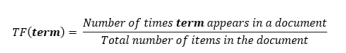
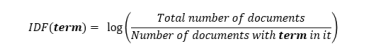
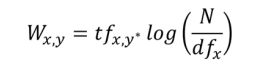

**Important Points about TF-IDF Vectorizer**
1. Similar to the count vectorization method, in the TF-IDF method, a document term matrix is generated and each
column represents an individual unique word.
2. The difference in the TF-IDF method is that each cell doesn’t indicate the term frequency, but contains a weight
value that signifies how important a word is for an individual text message or document
3. This method is based on the frequency method but it is different from the count vectorization in the sense that it
takes into considerations not just the occurrence of a word in a single document but in the entire corpus.
4. TF-IDF gives more weight to less frequently occurring events and less weight to expected events. So, it penalizes
frequently occurring words that appear frequently in a document such as “the”, “is” but assigns greater weight to
less frequent or rare words.
5. The product of TF x IDF of a word indicates how often the token is found in the document and how unique the
token is to the whole entire corpus of documents.


**Some disadvantages about TF-IDF Vectorizer**
1. does not address out of vocabulary (OOV) problem.
2. does not capture the relation between the words.
3. as the words increases, the dimensionality also increases.

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfV = TfidfVectorizer()

In [113]:
vectorized_text = tfV.fit_transform(text_list)

In [114]:
print(tfV.vocabulary_)

{'in': 35, 'this': 90, 'lecture': 46, 'we': 104, 'take': 87, 'completely': 13, 'different': 21, 'approach': 6, 'specifically': 80, 'solve': 77, 'the': 89, 'problem': 66, 'of': 59, 'classifying': 12, 'nonlinearly': 58, 'separable': 74, 'patterns': 64, 'by': 9, 'proceeding': 68, 'hybrid': 34, 'manner': 51, 'involving': 38, 'two': 98, 'stages': 83, 'first': 27, 'stage': 82, 'transforms': 97, 'given': 31, 'set': 75, 'into': 37, 'new': 55, 'for': 28, 'which': 105, 'under': 99, 'certain': 10, 'conditions': 15, 'likelihood': 47, 'transformed': 96, 'becoming': 8, 'linearly': 49, 'is': 39, 'high': 33, 'mathematical': 52, 'justification': 41, 'transformation': 95, 'traced': 93, 'to': 92, 'an': 2, 'early': 23, 'paper': 62, 'cover': 19, '1965': 0, 'second': 72, 'completes': 14, 'solution': 76, 'prescribed': 65, 'classification': 11, 'using': 103, 'least': 45, 'squares': 81, 'estimation': 25, 'radial': 69, 'basis': 7, 'function': 30, 'rbf': 70, 'network': 54, 'structure': 84, 'consists': 18, 'only'

In [115]:
tfV.vocabulary_.get("supply") # 'supply': 86 and so on

86

In [116]:
# to get the score of each index(word) (idf score)
all_features_name = tfV.get_feature_names_out()

for word in all_features_name:# you can use (tfV.get_feature_names_out()) instead of the all_features_name object
    index = tfV.vocabulary_.get(word) # vocabulary_.get() is method to get the index of a certain word
    print(f"{index} {word} : {tfV.idf_[index]}")

0 1965 : 1.4054651081081644
1 activation : 1.4054651081081644
2 an : 1.0
3 applications : 1.4054651081081644
4 applied : 1.4054651081081644
5 applies : 1.4054651081081644
6 approach : 1.4054651081081644
7 basis : 1.4054651081081644
8 becoming : 1.4054651081081644
9 by : 1.4054651081081644
10 certain : 1.4054651081081644
11 classification : 1.4054651081081644
12 classifying : 1.4054651081081644
13 completely : 1.4054651081081644
14 completes : 1.4054651081081644
15 conditions : 1.4054651081081644
16 connect : 1.4054651081081644
17 consisting : 1.4054651081081644
18 consists : 1.4054651081081644
19 cover : 1.4054651081081644
20 designed : 1.4054651081081644
21 different : 1.4054651081081644
22 dimensionality : 1.4054651081081644
23 early : 1.4054651081081644
24 environment : 1.4054651081081644
25 estimation : 1.4054651081081644
26 feature : 1.4054651081081644
27 first : 1.4054651081081644
28 for : 1.0
29 from : 1.4054651081081644
30 function : 1.4054651081081644
31 given : 1.405465108108

In [117]:
# to get the TF-IDF: 
vectorized_text.toarray()

array([[0.08569242, 0.        , 0.06097086, 0.        , 0.        ,
        0.        , 0.08569242, 0.        , 0.08569242, 0.25707725,
        0.08569242, 0.08569242, 0.08569242, 0.08569242, 0.08569242,
        0.08569242, 0.        , 0.        , 0.        , 0.08569242,
        0.        , 0.08569242, 0.        , 0.08569242, 0.        ,
        0.08569242, 0.        , 0.08569242, 0.06097086, 0.        ,
        0.        , 0.08569242, 0.        , 0.06097086, 0.06097086,
        0.12194172, 0.        , 0.08569242, 0.08569242, 0.12194172,
        0.        , 0.08569242, 0.        , 0.        , 0.        ,
        0.08569242, 0.08569242, 0.08569242, 0.        , 0.08569242,
        0.        , 0.06097086, 0.08569242, 0.        , 0.        ,
        0.08569242, 0.        , 0.        , 0.17138483, 0.24388344,
        0.        , 0.        , 0.08569242, 0.        , 0.25707725,
        0.08569242, 0.17138483, 0.        , 0.08569242, 0.        ,
        0.        , 0.        , 0.06097086, 0.  

##### Word Embeddings

Since *tf-idf* does not caputre the meaning of the words, **word embeddings** came to solve that issue.

**Word Embedding** is a learned representation for text where words that have the same meaning have a similar
representation. 

numerical vector representations of word semantics, or meaning, including literal and implied meaning. So word
vectors can capture the connotation of words.


**Important points of Words Embeddings**
1. Similar words, have similar vectors
2. Dimensionality are low

                                               **Word Embedding techniques**

**Built on CBOW (Continous Bag Of Words), Skip Gram**

- CBOW-> given a context word, to predict target word
- Skip gram-> given a target word, to predict context word. In this tech, the word embedding between the input layer & hidden layer, the c bar between the wieght layer and the output layer

1. Word2vec
2. GloVe
3. fastText



**Based on Advanced techniques in NLP built on Transformers** 
1. Bert
2. GPT

**Based on LSTM**
1. ELMo

##### Word Vector (Word embedding using Gensim)

before training any alogrithm, we need to do some preprocess steps as we've been doing above and they include: 
- lower case all text
- removing punctuations
- etc...

However, gensim has a function that do all the thing which is <code>gensim.utils.simple_preprocess</code>  and it make the text as a vector

In [121]:
from gensim.utils import simple_preprocess

In [122]:
text_cleaned[:36]

' In this lecture we take a completel'

In [123]:
text_gensim = simple_preprocess(text_cleaned[:36])
text_gensim

['in', 'this', 'lecture', 'we', 'take', 'completel']

In [124]:
text_gensim = simple_preprocess(text_cleaned)

In [125]:
words["NLTK words"].iloc[:10]

0              In
1            this
2         lecture
3              we
4            take
5               a
6      completely
7       different
8        approach
9    Specifically
Name: NLTK words, dtype: object

In [126]:
genism_10words = words["NLTK words"].iloc[:10].apply(simple_preprocess)
genism_10words

0              [in]
1            [this]
2         [lecture]
3              [we]
4            [take]
5                []
6      [completely]
7       [different]
8        [approach]
9    [specifically]
Name: NLTK words, dtype: object

In [127]:
from gensim.models import Word2Vec
model = Word2Vec(
    window=5, # means 5 words before the target word and 10 after it
    min_count = 2,
    workers=8,
)

model.build_vocab(text_gensim, progress_per=5)

In [128]:
model.epochs # the 5 is a default number of the times of iterations on the full data

5

In [129]:
model.corpus_count

202

In [130]:
model.train(text, total_examples=model.corpus_count, epochs=model.epochs)

(857, 6875)

In [131]:
model.save("./lecture-8-model-pretrained.model")

Since we're dealing with single text, the model cant learn the words together since each word is a single vector, 
word2Vec works as window of the text, so when we do a tokenization of that single text into words, each word will be a single vector of its own, so the model will not capture anything, in the other hand, if the text is list of multiple texts, the model will do the job.

In [133]:
model.wv.most_similar("f")

[('s', 0.2529045641422272),
 ('b', 0.14256367087364197),
 ('t', 0.13725271821022034),
 ('g', 0.1166219636797905),
 ('k', 0.07191766053438187),
 ('o', 0.04410674050450325),
 ('u', 0.027008363977074623),
 ('r', 0.012811624445021152),
 ('i', 0.006598467472940683),
 ('p', -0.0011978144757449627)]

To get a vector of a certain word

In [242]:
model.wv["f"]

array([-0.00950012,  0.00956222, -0.00777076, -0.00264551, -0.00490641,
       -0.0049667 , -0.00802359, -0.00778358, -0.00455321, -0.00127536,
       -0.00510299,  0.00614054, -0.00951662, -0.0053071 ,  0.00943715,
        0.00699133,  0.00767582,  0.00423474,  0.00050709, -0.00598114,
        0.00601878,  0.00263503,  0.00769943,  0.00639384,  0.00794257,
        0.00865741, -0.00989575, -0.0067557 ,  0.00133757,  0.0064403 ,
        0.00737382,  0.00551698,  0.00766163, -0.00512557,  0.00658441,
       -0.00410837, -0.00905534,  0.00914168,  0.0013314 , -0.00275968,
       -0.00247784, -0.00422048,  0.00481234,  0.00440022, -0.00265336,
       -0.00734188, -0.00356585, -0.00033661,  0.00609589, -0.00283734,
       -0.00012089,  0.00087973, -0.00709565,  0.002065  , -0.00143242,
        0.00280215,  0.00484222, -0.00135202, -0.00278014,  0.00773865,
        0.0050456 ,  0.00671352,  0.00451564,  0.00866716,  0.00747497,
       -0.00108189,  0.00874764,  0.00460172,  0.00544063, -0.00

##### Word Vector (Word embedding using Spacy)

In [135]:
nlp = spacy.load('en_core_web_lg')

In [136]:
text_spacy = nlp(text_cleaned)
for token in text_spacy:
    print("Token:", token.text, " Vector:", token.has_vector, " OOV:", token.is_oov)

Token:    Vector: False  OOV: True
Token: In  Vector: True  OOV: False
Token: this  Vector: True  OOV: False
Token: lecture  Vector: True  OOV: False
Token: we  Vector: True  OOV: False
Token: take  Vector: True  OOV: False
Token: a  Vector: True  OOV: False
Token: completely  Vector: True  OOV: False
Token: different  Vector: True  OOV: False
Token: approach  Vector: True  OOV: False
Token: Specifically  Vector: True  OOV: False
Token: we  Vector: True  OOV: False
Token: solve  Vector: True  OOV: False
Token: the  Vector: True  OOV: False
Token: problem  Vector: True  OOV: False
Token: of  Vector: True  OOV: False
Token: classifying  Vector: True  OOV: False
Token: nonlinearly  Vector: True  OOV: False
Token: separable  Vector: True  OOV: False
Token: patterns  Vector: True  OOV: False
Token: by  Vector: True  OOV: False
Token: proceeding  Vector: True  OOV: False
Token: in  Vector: True  OOV: False
Token: a  Vector: True  OOV: False
Token: hybrid  Vector: True  OOV: False
Token: mann

to make a vector we can use the vector method for each token.

In [138]:
vectorized_text_spacy = text_spacy.vector
print("Data before stacking\n",vectorized_text_spacy)

Data before stacking
 [-3.00084829e+00  8.16840112e-01 -8.79860044e-01  1.08452272e+00
  5.51078415e+00 -2.28936851e-01  1.36793578e+00  4.38829660e+00
  3.62296477e-02 -9.04294789e-01  8.06497574e+00  1.84125233e+00
 -4.57186174e+00  1.75418544e+00  5.01829505e-01  2.27618361e+00
  2.49274421e+00  1.24647856e+00 -1.14556015e+00 -1.95419097e+00
  3.10825258e-01 -7.11867630e-01 -1.51449990e+00  1.23233521e+00
 -4.86318991e-02 -1.71744144e+00 -2.28921771e+00 -1.23251343e+00
 -9.41623747e-01  2.35453391e+00  1.06821096e+00 -7.23222503e-03
 -5.49829781e-01 -2.32794929e+00 -2.87862515e+00 -1.06887221e+00
 -2.10259020e-01  1.44252336e+00  2.02876496e+00  3.66146326e-01
  4.30871159e-01 -4.64831084e-01 -1.10738349e+00  7.60156572e-01
 -2.12335587e+00  2.09006691e+00  2.02235818e+00 -6.42758012e-01
 -4.60937172e-01  2.85151690e-01 -1.01468766e+00  2.53946424e+00
 -4.84148651e-01 -4.38228750e+00 -1.33401370e+00  8.78263831e-01
 -1.84939116e-01  1.54836380e+00  6.36276364e-01 -1.75611186e+00
  1

here where you can get the similarity

In [140]:
doc = nlp("sandwich bread")
doc[0].similarity(doc[1])

0.6341067552566528

# do not forget to do the exercise when your done the course

# All notebook libraries